<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/material/interpolation_details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Appendix
Thecnical details of interpolation functions: [interpolation_details.ipynb](./interpolation_details.ipynb)

# Divided Differences

In spite of the good precision achieved by the Lagrange interpolating polynomials, analytical manipulation of such an expressions is rather complicated. Furthermore, when applying other polynomials-based techniques like Hermite polynomials, the algorithms present very different ways to achieve the final interpolation, making a comparison unclear.

Divided differences is a way to standardize the notation for interpolating polynomials. Suppose a polynomial $P_n(x)$ and write it in the next form:

$$P_n(x) = a_0 + a_1(x-x_0)+ a_2 (x-x_0)(x-x_1)+\cdots + a_n(x-x_0)\cdots (x-x_{n-1})$$

where $a_i$ are a set of constants to be determined from the given data $(x_i, y_i)$.

Note that due to the definition of an interpolant function, previous expression should satisfy:

$$P_n(x_0) = a_0 = y_0$$

$$P_n(x_1) = a_0 + a_1(x_1-x_0) = y_0 + a_1(x_1-x_0) = y_1 \ \ \ \longrightarrow \ \ \ \ a_1 = \frac{f(x_1)-f(x_0)}{x_1-x_0}$$

$\cdots$ and so.

Defining the **zeroth divided difference**, $k=0$, of $x_i$ like

$$D_0[x_i] \equiv f[x_i] \equiv f(x_i) = y_i$$

the **first divided difference**, $k=1$ of $x_i$ like

$$D_1[x_i] \equiv f[x_i, x_{i+1}] \equiv \frac{f[x_{i+1}]-f[x_i]}{x_{i+1}-x_i}$$

$$D_1[x_i] = \frac{D_{0}[x_{i+1}]-D_{0}[x_{i}]}{x_{i+1}-x_i} $$

the **second divided difference**, $k=2$ of $x_i$ like

$$D_2[x_i]\equiv f[x_i,x_{i+1},x_{i+2}] \equiv \frac{f[x_{i+1},x_{i+2}]-f[x_i,x_{i+1}]}{x_{i+2}-x_{i}}$$

$$D_2[x_i]=\frac{D_1[x_{i+1}]-D_1[x_i]}{x_{i+2}-x_{i}}$$

successively until the **kth divided difference**

$$D_k[x_i] \equiv f[x_i, x_{i+1},\cdots, x_{i+k-1},x_{i+k}] \equiv \frac{f[x_{i+1},x_{i+2}\cdots, x_{i+k}]-f[x_i, x_{i+1},\cdots, x_{i+k-1}]}{x_{i+k}-x_i}$$

$$D_k[x_i] = \frac{D_{k-1}[x_{i+1}]-D_{k-1}[x_{i}]}{x_{i+k}-x_i}$$

These expressions are the fundamental bricks for any interpolating method.

In [15]:
#Construction of a kth divided difference (recursive code)
def D( i, k, Xn, Yn ):
    #If k+i>N
    if i+k>=len(Xn):
        return 0
    #Zeroth divided difference
    elif k == 0:
        return Yn[i]
    #If higher divided difference
    else:
        return (D(i+1, k-1, Xn, Yn)-D(i, k-1, Xn, Yn))/(Xn[i+k]-Xn[i])

## Example 2

As an example, Lagrange interpolation can be also derived by using divided differences, which is reached through the next equation:

$$P_n(x) = D_0[x_0] + \sum_{k=1}^n D_k[x_0] (x-x_0) \cdots (x-x_{k-1})$$

Note this expression is by far easier to be manipulated analytically as we can know the coefficients of each order.

## <font color='red'>     **Activity** </font>

<font color='red'>    
    
Using the previous expression and the defined function for divided differences, show both methods to calculate Lagrange interpolators are equivalents.
</font>

- - -

# Hermite Interpolation

From calculus we know that Taylor polynomials expand a function at a specific point $x_i$, being both functions (the original one and the Taylor function) exactly equal at any derivative-order at that point. Also, as mentioned before, a Lagrange polynomial, given a set of data points, passes through all those points at the same time. However if those points come from an unknown underlying function $f(x)$, the interpolant polynomial might (surely) differ from the real function at any superior derivative-order. So we have:

- **Taylor polynomials** are exact at any order, but that only remains true at a specific point.

- **Lagrange polynomials** pass through all points of a give dataset, but only at zeroth-order. Derivatives are not longer equal.

Once established these differences, we can introduce Hermite polynomials just as a generalization of both, Taylor and Lagrange polynomials.

At first, Hermite polynomials can be approximated at any desired order at all the points, as long as one has all these information. However, for the sake of simplicity and without loss of generality, we shall assume Hermite polynomials equal to the real function at zeroth and first-derivative order.

Let's suppose a dataset $\{x_i\}_i$ for $i = 0,1,\cdots,n$ with the respective values $\{f(x_i)\}_i$ and $\{f'(x_i)\}_i$. If we assume two different polynomials to fit each set of data, i.e. a polynomial for $\{f(x_i)\}_i$ and another for $\{f'(x_i)\}_i$, we obtain $2n+2$ coefficients, however zeroth-order coefficients can be put together so finally there are $2n+1$ independet coefficients to be determined. In this case, we assign the respective Hermite polynimial as $H_{2n+1}(x)$.

## Derivation in terms of divided differences

Remembering the divided differences expression for a Lagrange polynomial

$$P_n(x) = D_0[x_0] + \sum_{k=1}^n D_k[x_0] (x-x_0) \cdots (x-x_{k-1})$$

and by defining a new sequence $\{z_0, z_1, \cdots, z_{2n+1}\}$ such that

$$z_{2i} = z_{2i+1} = x_i \mbox{ for } i = 0,1,\cdots, n$$

However, divided differences has to be modified in order to include first-order derivatives:

![](https://raw.githubusercontent.com/sbustamante/ComputationalMethods/master/material/figures/table_coefficients.png)

Note that $f[z_0,z_1]$ sould be originally

$$f[z_0,z_1] = \frac{f[z_1]-f[z_0]}{z_1-z_0}$$

but replacing $z_0 = z_1 = x_0$ this would lead an indetermination. In order to solve this issue, this indertemination can be readily approximated to the derivative at $z_0$, so

$$f[z_0,z_1] = f'(x_0)$$

or using the previously defined notation

$$D_1[z_0] = f'(x_0)$$

Generally, for first-order divided differences we will have

$$D_1[z_{2i}] = f'(x_i)$$

$$D_1[z_{2i+1}] = D_1[x_i]$$

Higher order divided differences are calculated as usual.

Finally, the Hermite polynomial is built using the next expression

$$H_{2n+1}(x) = D_0[z_0] + \sum_{k=1}^{2n+1} D_k[z_0] (x-z_0) \cdots (x-z_{k-1})$$


## Example

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
import pandas as pd

In [18]:
df=pd.read_csv('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/interpolation.csv')
df

,X,Y
0,3.0,8.0
1,10.0,6.5
2,21.3,3.0


### Hermite interpolation
The recommend degree for the Hermite polynomial is $n-1$ where $n$ is the number of data points of the dataset

In [ ]:
H=np.polynomial.hermite.Hermite.fit(df.X,df.Y,2)

Text(0,0.5,'$H(x)$')

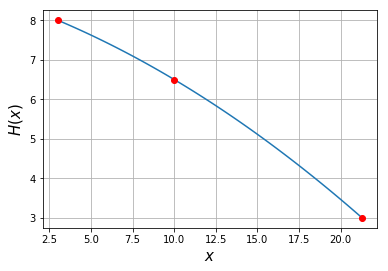

In [ ]:
x=np.linspace(df.X.min(),df.X.max(),100)
plt.plot(x,H(x))
plt.plot(df.X,df.Y,'ro')
plt.grid()
plt.xlabel('$x$',size=15)
plt.ylabel('$H(x)$',size=15)

## Example 3

Define a routine to calculate divided differences for Hermite polynomials.

In [ ]:
#Construction of a kth divided difference for Hermite polynomials (recursive code)
def Dh( j, k, Zn, Yn, Ypn ):
    #If k+j>N
    if j+k>=len(Zn):
        return 0
    #Zeroth divided difference
    elif k == 0:
        return Yn[j/2]
    #First order divided difference (even indexes)
    elif k == 1 and j%2 == 0:
        return Ypn[j/2]
    #If higher divided difference
    else:
        return (Dh(j+1, k-1, Zn, Yn, Ypn)-Dh(j, k-1, Zn, Yn, Ypn))/(Zn[j+k]-Zn[j])

## <font color='red'> **Activity** </font>

<font color='red'>    

Calculate a routine, using the previous program for divided differences, that computes the Hermite polynomial given a dataset.

Generate a set of $N$ points of the function $\sin^2(x)$ between $0$ and $2\pi$, including an array of $x$ positions, $y = f(x)$ and first derivative $y' = f'(x)$.

Show which polynomial gives the best approximation to the real function, Hermite or Lagrange polynomial.

</font>

<font color='white'>
Solution:

nbviewer.ipython.org/github/sbustamante/ComputationalMethods/blob/master/activities/hermite-and-lagrange.ipynb
</font>

- - -